In [69]:
# Import section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  
import folium
from folium.plugins import HeatMap

# Reading data gathered from 
# http://insideairbnb.com/get-the-data.html

df_list_sum_2007 = pd.read_csv('./Data/listings_sum_2007.csv')
df_list_sum_1907 = pd.read_csv('./Data/listings_sum_1907.csv')
df_list_sum_1807 = pd.read_csv('./Data/listings_sum_1807.csv')
df_list_sum_1507 = pd.read_csv('./Data/listings_sum_1507.csv')

df_list_2007 = pd.read_csv('./Data/listings_2007.csv',low_memory=False)
df_list_1907 = pd.read_csv('./Data/listings_1907.csv',low_memory=False)
df_list_1807 = pd.read_csv('./Data/listings_1807.csv',low_memory=False)
df_list_1507 = pd.read_csv('./Data/listings_1507.csv',low_memory=False)

df_cal_2007 = pd.read_csv('./Data/calendar_2007.csv.gz')
df_cal_1907 = pd.read_csv('./Data/calendar_1907.csv.gz')
df_cal_1807 = pd.read_csv('./Data/calendar_1807.csv.gz')
df_cal_1507 = pd.read_csv('./Data/calendar_1507.csv.gz')

In [70]:
#Checking various aspects for dataset
def explore_df(df):
    print("\nNo of Columns: \n", df.shape[1]) 
    print("\nNo of Rows: \n", df.shape[0])
    print("\nAvailable Columns: \n", df.columns)
    print("\nColumns with Nill Values: \n",set(df.columns[df.isnull().mean()==0])) #set of columns with no missing values.
    print("\nColumns with more than 50% NaN: \n",set(df.columns[df.isnull().mean()>.5])) #set of columns with more than 50% of the values missing
    return

In [71]:
explore_df(df_list_sum_2007)


No of Columns: 
 16

No of Rows: 
 11238

Available Columns: 
 Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Columns with Nill Values: 
 {'longitude', 'host_id', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'availability_365', 'neighbourhood', 'id', 'calculated_host_listings_count', 'latitude'}

Columns with more than 50% NaN: 
 {'neighbourhood_group'}


In [72]:
df_list_sum_2007.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [73]:
df_list_sum_2007.drop(columns=['name','host_id','host_name','neighbourhood_group','latitude','longitude']).head(3)

,id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10595,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,63,1,25,2020-03-15,0.22,6,356
1,10990,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,39,1,36,2020-07-14,0.37,6,246
2,10993,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,39,1,48,2020-01-17,0.50,6,345


In [74]:
df_list_sum_2007.drop(columns=['id','name','host_id','host_name','neighbourhood_group','latitude','longitude']).describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11238.000000,11238.000000,11238.000000,8525.000000,11238.000000,11238.000000
mean,69.906923,4.364211,34.980779,1.586203,10.188824,237.232070
std,282.816160,22.271062,61.414415,1.691475,22.133357,131.516315
min,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,32.000000,1.000000,1.000000,0.310000,1.000000,135.000000
50%,46.000000,2.000000,8.000000,0.970000,2.000000,293.500000
75%,70.000000,2.000000,42.000000,2.310000,7.000000,358.000000
max,21814.000000,1000.000000,711.000000,12.580000,139.000000,365.000000


In [75]:
df_list_sum_1907.drop(columns=['id','name','host_id','host_name','neighbourhood_group','latitude','longitude']).describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11047.000000,11047.000000,11047.000000,8488.000000,11047.000000,11047.000000
mean,65.325699,3.587128,30.848466,2.248765,10.059835,228.450258
std,147.142550,19.435124,54.932436,2.103603,21.712888,119.020295
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,33.000000,1.000000,1.000000,0.600000,1.000000,136.000000
50%,47.000000,2.000000,8.000000,1.610000,2.000000,267.000000
75%,70.000000,2.000000,35.000000,3.350000,6.000000,335.000000
max,7000.000000,1000.000000,654.000000,15.500000,127.000000,365.000000


In [76]:
# ###########################################################################
explore_df(df_list_2007)


No of Columns: 
 101

No of Rows: 
 11238

Available Columns: 
 Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       ...
       'requires_license', 'jurisdiction_names', 'is_business_travel_ready',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=101)

Columns with Nill Values: 
 {'minimum_maximum_nights', 'maximum_minimum_nights', 'availability_30', 'minimum_minimum_nights', 'availability_90', 'minimum_nights_avg_ntm', 'calculated_host_listings_count_entire_homes', 'availability_60', 'scrape_id', 'property_type', 'has_availability', 'maximum_nights_avg_ntm', 'calendar_last_scraped', 'number_of_reviews', 'host_verifi

In [77]:
# Define the dates that correspond to datasets used
dates=['Jul-2015','Jul-2018','Jul-2019','Jul-2020']

# Define a list of number of available listings for available month/years
listings=[df_list_sum_1507.shape[0],df_list_sum_1807.shape[0],df_list_sum_1907.shape[0],df_list_sum_2007.shape[0]]

# Define a list of average reviews for available month/years
reviews=[df_list_sum_1507['number_of_reviews'].mean(),df_list_sum_1807['number_of_reviews'].mean(),df_list_sum_1907['number_of_reviews'].mean(),df_list_sum_2007['number_of_reviews'].mean()]

# Define a list of listings for average price for available month/years
prices=[df_list_sum_1507['price'].mean(),df_list_sum_1807['price'].mean(),df_list_sum_1907['price'].mean(),df_list_sum_2007['price'].mean()]


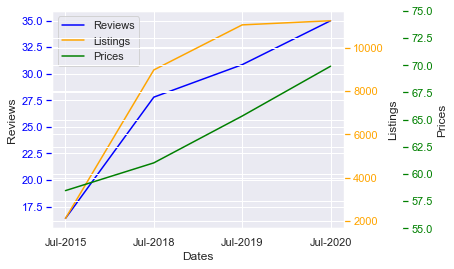

In [78]:
# Plot a graph with the number of listings and reviews and the average price over time 
base, host = plt.subplots()
base.subplots_adjust(right=0.80)

par1 = host.twinx()
par2 = host.twinx()

par2.spines["right"].set_position(("axes", 1.2))

p1, = host.plot(dates,reviews,label='Reviews',color='blue')
p2, = par1.plot(dates,listings,label='Listings',color='orange')
p3, = par2.plot(dates,prices,label='Prices',color='green')

par2.set_ylim(55, 75)

host.set_xlabel("Dates")
host.set_ylabel("Reviews")
par1.set_ylabel("Listings")
par2.set_ylabel("Prices")

host.tick_params(axis='y', colors='blue')
par1.tick_params(axis='y', colors='orange')
par2.tick_params(axis='y', colors='green')

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines])

plt.show()


In [79]:
explore_df(df_cal_2007)


No of Columns: 
 7

No of Rows: 
 4101893

Available Columns: 
 Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

Columns with Nill Values: 
 {'listing_id', 'date', 'price', 'adjusted_price', 'available'}

Columns with more than 50% NaN: 
 set()


In [80]:
df_cal_2007.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,48635,2020-07-21,t,$25.00,$25.00,1.0,35.0
1,10595,2020-07-28,f,$40.00,$36.00,2.0,45.0
2,10595,2020-07-29,f,$40.00,$36.00,2.0,45.0


In [81]:
df_cal_2007.describe()

,listing_id,minimum_nights,maximum_nights
count,4.101893e+06,4.101870e+06,4.101870e+06
mean,2.770471e+07,4.317502e+00,8.826535e+02
std,1.107219e+07,2.100857e+01,4.504652e+02
min,1.059500e+04,1.000000e+00,1.000000e+00
25%,2.014168e+07,1.000000e+00,1.115000e+03
50%,2.926612e+07,2.000000e+00,1.125000e+03
75%,3.650427e+07,2.000000e+00,1.125000e+03
max,4.432253e+07,1.000000e+03,1.000000e+04


In [82]:
# Check if an Airbnb listing is available to be booked or not. 
# If a listing is not available for booking, we can assume it is either being booked or not made available to be booked.

cal_1507 = len(df_cal_1507.query('available=="f"'))
cal_1807 = len(df_cal_1807.query('available=="f"'))
cal_1907 = len(df_cal_1907.query('available=="f"'))
cal_2007 = len(df_cal_2007.query('available=="f"'))

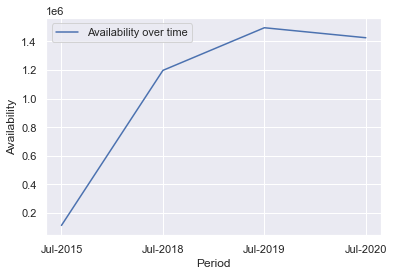

In [83]:
availability=[cal_1507,cal_1807,cal_1907,cal_2007]
dates=['Jul-2015','Jul-2018','Jul-2019','Jul-2020']

plt.plot(dates,availability,label='Availability over time')
plt.xlabel("Period")
plt.ylabel("Availability")
plt.legend()
plt.show()

In [84]:
# Available neighbourhoods
neighb = pd.read_csv('./Data/neighbourhoods_.csv')
print("No of neighbourhoods: ",neighb.shape[0])

No of neighbourhoods:  45


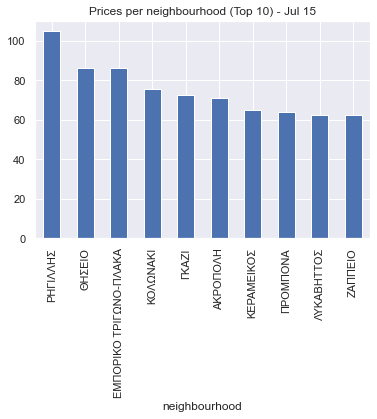

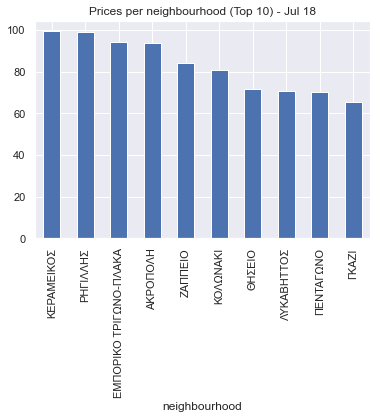

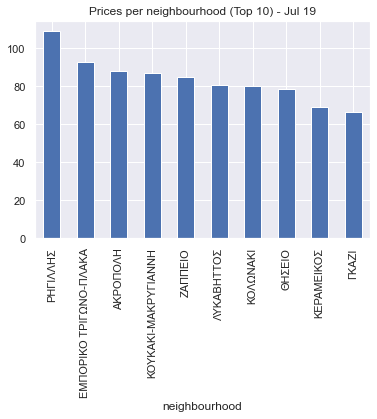

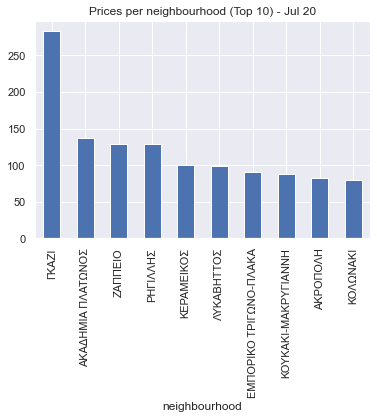

In [85]:
# Plot average price per neighbourhood
def neigh_bar(df, sort, title):
    neighb = df.groupby(['neighbourhood']).mean()['price'].sort_values(ascending=sort)
    neighb[:10].plot(kind="bar");
    plt.title(title);
    plt.show()
    return


neigh_bar(df_list_sum_1507, False, "Prices per neighbourhood (Top 10) - Jul 15")
neigh_bar(df_list_sum_1807, False, "Prices per neighbourhood (Top 10) - Jul 18")
neigh_bar(df_list_sum_1907, False, "Prices per neighbourhood (Top 10) - Jul 19")
neigh_bar(df_list_sum_2007, False, "Prices per neighbourhood (Top 10) - Jul 20")


In [86]:
neighbour = df_list_sum_2007['neighbourhood'].value_counts().reset_index()
neighbour.columns = ['neighbourhood', 'count']
neighbour['%'] = neighbour['count']/neighbour['count'].sum() * 100
neighbour[:10]

,neighbourhood,count,%
0,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,1927,17.147179
1,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,967,8.604734
2,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,881,7.839473
3,ΝΕΟΣ ΚΟΣΜΟΣ,832,7.403453
4,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,702,6.246663
5,ΠΑΓΚΡΑΤΙ,510,4.538174
6,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,494,4.395800
7,ΚΟΛΩΝΑΚΙ,388,3.452572
8,ΑΚΡΟΠΟΛΗ,371,3.301299
9,ΑΜΠΕΛΟΚΗΠΟΙ,358,3.185620


In [87]:
df_list_sum_2007.groupby(['room_type']).mean()['price']

room_type
Entire home/apt     68.073071
Hotel room         189.341346
Private room        58.577816
Shared room        146.463415
Name: price, dtype: float64

In [88]:
neighb_cnt = df_list_sum_2007.neighbourhood.value_counts()

neighb_cnt.sum()

11238

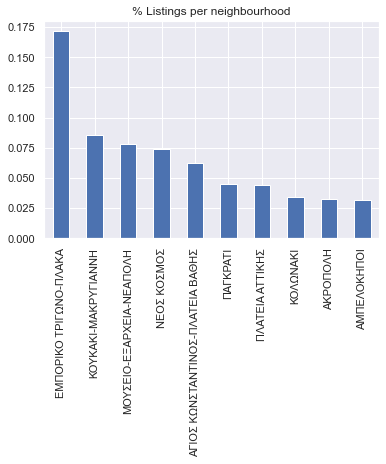

In [89]:
neighb_cnt = df_list_sum_2007.neighbourhood.value_counts() #Provide a pandas series of the listings counts for each neighbourhood

# The below should be a bar chart of the proportion of listings in each neighbourhood

(neighb_cnt[:10]/neighb_cnt.sum()).plot(kind="bar");
plt.title("% Listings per neighbourhood");

In [90]:
#More active neigbourhoods

x=6
x1=neighb_cnt[:x].sum()/neighb_cnt.sum()*100
x2=x/neighb.shape[0]*100
print("More than {:.1f}% of all listings come from {:.1f}% of the neigbourhoods".format(x1,x2))


More than 51.8% of all listings come from 13.3% of the neigbourhoods


In [91]:
neighb_cnt

ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              1927
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                  967
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             881
ΝΕΟΣ ΚΟΣΜΟΣ                          832
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     702
ΠΑΓΚΡΑΤΙ                             510
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      494
ΚΟΛΩΝΑΚΙ                             388
ΑΚΡΟΠΟΛΗ                             371
ΑΜΠΕΛΟΚΗΠΟΙ                          358
ΚΥΨΕΛΗ                               333
ΘΗΣΕΙΟ                               309
ΠΕΤΡΑΛΩΝΑ                            299
ΚΕΡΑΜΕΙΚΟΣ                           268
ΣΤΑΔΙΟ                               258
ΙΛΙΣΙΑ                               196
ΓΟΥΔΙ                                167
ΛΥΚΑΒΗΤΤΟΣ                           142
ΖΑΠΠΕΙΟ                              140
ΠΑΤΗΣΙΑ                              140
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                     135
ΝΙΡΒΑΝΑ                              129
ΓΚΥΖΗ                                122
ΑΝΩ ΚΥΨΕΛΗ                           101
ΓΚΑΖΙ           

In [92]:
#pd.DataFrame(df_list_sum.query("Professional == 'Professional developer' and (Gender == 'Male' or Gender == 'Female')").groupby(['Gender', 'FormalEducation']).mean()['Salary'])

In [93]:
###########################################
df_cal_2007['date']

0          2020-07-21
1          2020-07-28
2          2020-07-29
3          2020-07-30
4          2020-07-31
              ...    
4101888    2021-07-22
4101889    2021-07-23
4101890    2021-07-24
4101891    2021-07-25
4101892    2021-07-26
Name: date, Length: 4101893, dtype: object

In [94]:
df_cal_2007['date'] = pd.to_datetime(df_cal_2007['date'])

#aa = df_cal.groupby(pd.Grouper(key='date',freq='M')).count()

aa = df_cal_2007.groupby(df_cal_2007['date'])

print(aa)




In [95]:


df5 = pd.read_csv('./Data/reviews.csv')

df6 = pd.read_csv('./Data/reviews_.csv')



In [96]:

df5.head(12)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,10595,271535,2011-05-20,189305,Pamela,"The apartment was wonderful, fully equiped, be..."
1,10595,1994237,2012-08-15,289831,Andrey,Emmanouil was an excellent host. He provided u...
2,10595,4678609,2013-05-20,2635427,Ahmet,"Manos is a very good host, he is kind and help..."
3,10595,12502994,2014-05-04,2422327,Hema,"Our stay in Emmanouil home was comfortable, qu..."
4,10595,19482948,2014-09-13,6737784,Mariana,Fantastic accommodation very well located to v...
5,10595,30613190,2015-04-25,28845283,Karen,Manos was a very gracious host. He made sure ...
6,10595,32403740,2015-05-17,18119354,Luisa,Manos was an amazing host! To start he is very...
7,10595,33072497,2015-05-25,27699139,Brigitte,Appartement correspondant bien à la descriptio...
8,10595,48058154,2015-09-23,19495001,Eileen,"The apartment is exactly as described, very co..."
9,10595,57859668,2015-12-29,52563564,Thanasis,Great apartment and owner. 6 people we stayed ...


<AxesSubplot:>

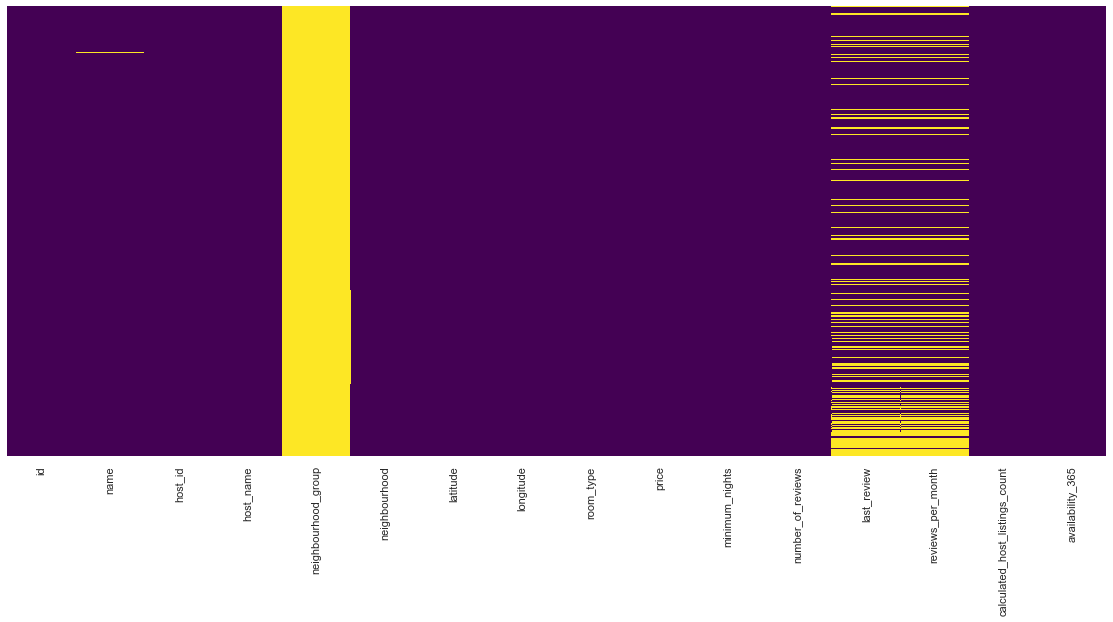

In [97]:
sns.set(rc={'figure.figsize':(19.7,8.27)})

sns.heatmap(df_list_sum_2007.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [98]:
neighb = df_list_sum_2007.groupby(['neighbourhood']).mean()['price'].sort_values(ascending=False)
aa= neighb[:10]

ss2 = ['ΓΚΑΖΙ',
'ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ',
'ΖΑΠΠΕΙΟ',
'ΡΗΓΙΛΛΗΣ',
'ΚΕΡΑΜΕΙΚΟΣ',
'ΛΥΚΑΒΗΤΤΟΣ',
'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ',
'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ',
'ΑΚΡΟΠΟΛΗ',
'ΚΟΛΩΝΑΚΙ']



df = df_list_sum_2007[df_list_sum_2007['neighbourhood'].isin(ss2)]



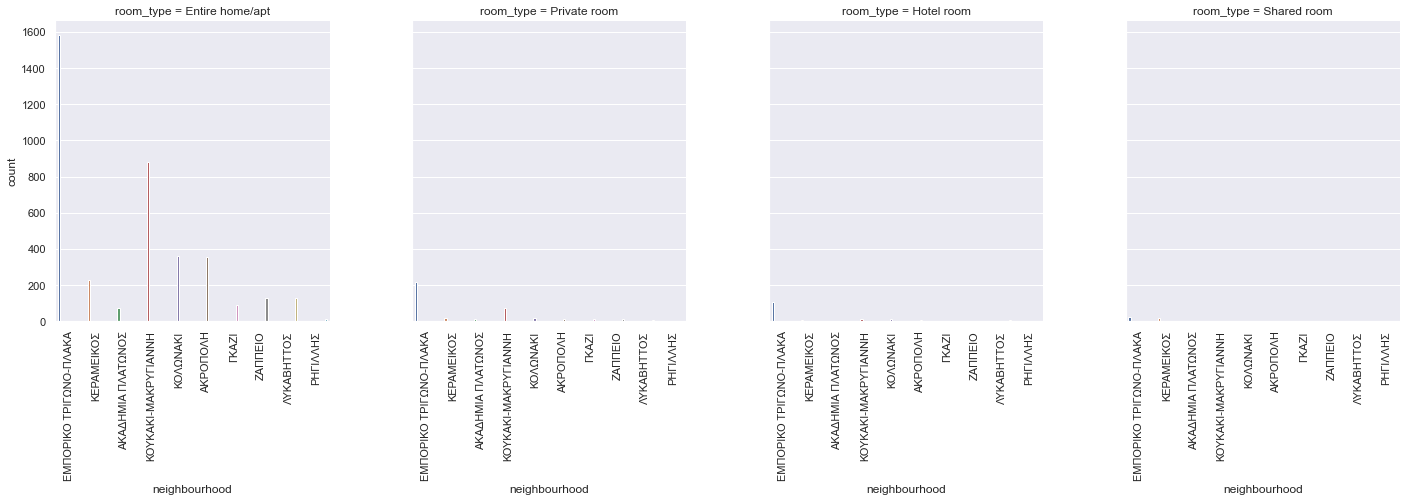

In [99]:
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood', col='room_type', data=df, kind='count')
viz_3.set_xticklabels(rotation=90)

In [100]:
df_list_sum_2007.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,63,1,25,2020-03-15,0.22,6,356
1,10990,Athens Quality Apartments - Deluxe Apartment,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,39,1,36,2020-07-14,0.37,6,246
2,10993,Athens Quality Apartments - Studio,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,39,1,48,2020-01-17,0.50,6,345


In [102]:
def foli_map(df):
    m=folium.Map([37.98,23.72],zoom_start=13)
    m2=folium.Map([37.98,23.72],zoom_start=13)
    HeatMap(df[['latitude','longitude']].dropna(),radius=9,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
    #HeatMap(df_list_sum_2007[['latitude','longitude']].dropna(),radius=9,gradient={0.2:'grey',0.4:'purple',0.6:'yellow',1.0:'black'}).add_to(m2)
    display(m)
    return
    
foli_map(df_list_sum_2007)
foli_map(df_list_sum_1907)   
